# Линейная регрессия

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Мы будем работать с датасетом simplicity_DA отсюда: https://github.com/feralvam/metaeval-simplification/tree/main/data. Это датасет ассессорских оценок автоматически упрощенных предложений. В нём эксперты оценивали пары предложений, состоящие из оригинального текста и текста, упрощенного моделью (использовалось несколько различных нейросетевых моделей), по параметрам fluency, meaning и simplicity.

In [3]:
simplicity_df = pd.read_csv('/content/drive/MyDrive/ML_training_data/simplicity_DA.csv')

Быстро проверим на отсутствующие данные:

In [4]:
simplicity_df.isnull().values.any()

False

In [5]:
simplicity_df.head()

,sent_id,sys_name,orig_sent,simp_sent,sys_type,fluency,fluency_zscore,meaning,meaning_zscore,simplicity,simplicity_zscore
0,268,ACCESS,Prunk is a member of Institute of European His...,Prunk is a member of Institute of European His...,NeuralSeq2Seq,77.400000,0.152400,77.333333,0.530362,71.333333,0.611060
1,67,SBMT-SARI,"In return, Rollo swore fealty to Charles, conv...","In return, Rollo swore fealty to Charles, conv...",SBMT,87.866667,0.512595,96.466667,1.142803,90.933333,1.257177
2,341,SBMT-SARI,From 1900 to 1920 many new facilities were con...,From 1900 to 1920 many new plants were built o...,SBMT,79.133333,0.119438,68.533333,0.284701,53.800000,0.158894
3,278,PBMT-R,Mercury is similar in appearance to the Moon: ...,Mercury is similar in appearance to the Moon: ...,PBMT,90.333333,0.598145,90.666667,0.965649,71.600000,0.664848
4,107,Hybrid,"He settled in London, devoting himself chiefly...","He settled in London, devoting himself.",Semantics+PBMT,65.466667,-0.425792,32.066667,-0.820035,27.733333,-0.577387


Давайте для начала попробуем предсказать простоту предложения (simplicity), ориентируясь на meaning preservation (meaning) - то, насколько хорошо модель сохранила значение исходного предложения.

Мы будем использовать функционал, во многом аналогичный линейным регрессиям в r, с которыми вы уже знакомы (https://pozdniakov.github.io/tidy_stats/340-lm.html). Тем не менее, поскольку мы работаем в sklearn, давайте заодно разделим выборку на тренировочную и тестовую. Это делается при помощи функции train_test_split.

In [6]:
from sklearn.model_selection import train_test_split

В данном случае наша зависимая переменная - simplicity, а независимая - meaning.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(simplicity_df['meaning'],
                                                    simplicity_df['simplicity'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

Обучим линейную регрессию на тренировочной выборке.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[42.26666667 89.66666667 89.33333333 31.33333333 58.6        97.66666667
 68.53333333 94.73333333 40.66666667 83.6        32.93333333 48.2
 78.93333333 42.93333333 57.6        85.         18.26666667 65.8
 61.8        65.2        93.93333333 53.73333333 20.93333333 59.33333333
 77.86666667 54.8        73.2        47.6        52.46666667 77.33333333
 85.06666667 24.93333333 29.26666667 73.2        29.46666667 36.86666667
 91.86666667 90.         42.73333333 31.66666667 94.6        62.2
 57.53333333 42.         92.66666667 76.8        70.26666667 41.26666667
 76.8        89.06666667 32.46666667 52.06666667 88.66666667 55.4
 46.93333333 24.8        43.73333333 65.93333333 68.         78.4
 46.86666667 63.13333333 53.06666667 59.6        48.         92.66666667
 46.8        35.2        89.86666667 49.93333333 40.33333333 27.73333333
 53.46666667 73.73333333 66.4        84.73333333 31.2        43.8
 28.13333333 44.93333333 25.4        42.66666667 80.46666667 24.66666667
 74.26666667 74.86666667  4.46666667 10.93333333 86.93333333 75.2
 88.13333333 63.06666667 53.13333333 58.66666667 89.2        70.4
 95.4        85.06666667 80.         94.73333333 52.2        91.26666667
 70.06666667 42.66666667 40.73333333 65.73333333 74.         29.4
 36.6        62.66666667 69.93333333 85.93333333 17.53333333 70.8
 83.53333333 60.4        91.26666667 43.26666667 82.93333333 86.13333333
 76.33333333 48.4        93.66666667 91.46666667 22.         57.8
 31.86666667 66.13333333 55.06666667 81.86666667 57.66666667 96.33333333
 81.         45.46666667 52.53333333 40.46666667 27.53333333 88.6
 59.06666667 90.66666667 38.26666667 43.6        44.93333333 92.6
 91.73333333 45.73333333 76.6        25.33333333 27.93333333 88.
 39.93333333 89.66666667 96.4        35.26666667 96.53333333 65.13333333
 64.06666667 92.53333333 88.53333333 68.06666667 95.         90.66666667
 52.73333333 50.26666667 52.6        29.13333333 90.8        58.06666667
 42.73333333 18.6        58.2        64.13333333 35.06666667 83.73333333
 65.2        89.73333333 86.66666667 46.         67.2        27.6
  7.93333333 71.73333333 38.2        94.2        94.86666667 48.2
 70.53333333 95.4        28.8        80.06666667 35.73333333 47.06666667
 50.53333333 85.86666667 63.8        69.         72.93333333 27.2
 27.86666667 90.06666667 78.2        78.         42.53333333 48.66666667
 55.53333333 64.33333333 89.6        60.06666667 31.73333333 37.93333333
 90.13333333 58.2        97.8        40.73333333 55.6        32.86666667
 86.13333333 68.46666667 74.13333333 47.26666667 85.93333333 66.
 20.93333333 54.26666667 98.         55.33333333 58.06666667 62.86666667
 68.2        43.13333333 97.26666667 93.26666667 75.86666667 76.8
 84.         87.8        48.6        62.         95.2        66.53333333
 21.33333333 18.6        95.26666667 22.86666667 91.26666667 81.13333333
 64.         55.53333333 43.13333333 67.4        91.8        25.46666667
 79.         34.53333333 71.6        19.93333333 93.33333333 87.33333333
 71.86666667 80.8        80.86666667 92.6        37.53333333 84.46666667
 39.26666667 32.33333333 51.53333333 54.4        54.13333333 85.46666667
 78.13333333 33.06666667 45.4        70.06666667 63.13333333 93.73333333
 94.06666667 24.         50.4        92.93333333 94.73333333 79.46666667
 97.86666667 80.2        46.2        49.8        70.86666667 89.06666667
 42.4        30.33333333 65.4        50.73333333 71.93333333 54.8
 79.66666667 74.4        96.13333333 76.4        47.6        32.53333333
 82.53333333 69.93333333 69.13333333 78.73333333 67.4        94.53333333
 43.26666667 79.8        76.86666667 62.6        35.         78.66666667
 68.8        70.86666667 65.53333333 41.46666667 81.86666667 73.53333333
 96.46666667 90.66666667 66.06666667 90.53333333 63.06666667 85.2
 72.13333333 96.06666667 44.46666667 97.33333333 31.26666667 54.46666667
 86.         50.26666667 72.6        35.46666667 30.4        32.46666667
 76.46666667 28.4        23.46666667 53.33333333 69.93333333 77.06666667
 76.93333333 53.53333333 42.4        79.73333333 59.66666667 95.53333333
 73.8        52.4        63.         93.2         1.26666667 37.66666667
 29.66666667 84.06666667 91.86666667 17.73333333 77.13333333 32.06666667
 34.66666667 67.4        74.53333333 67.93333333 53.13333333 37.13333333
 47.2        54.73333333 94.13333333 35.53333333 69.6        45.73333333
 30.73333333 35.53333333 95.         53.6        38.53333333 45.13333333
 89.53333333 89.13333333 98.66666667 87.26666667 60.4        46.93333333
 60.26666667 69.73333333 65.8        41.66666667 63.13333333 95.73333333
 63.8        97.73333333 93.2        84.73333333 45.93333333 66.13333333
 91.73333333 65.33333333 92.6        85.33333333 78.8        33.73333333
 93.         94.66666667 82.73333333 76.53333333 93.6        97.33333333
 96.8        60.26666667 75.6        26.73333333 67.66666667 30.33333333
 53.2        58.46666667 19.4        92.46666667 67.66666667  7.4
 10.         76.66666667 83.13333333 96.46666667 16.13333333 64.93333333
 30.33333333 60.73333333 44.         89.6        15.66666667 97.
 69.         14.26666667 84.93333333 64.46666667 34.93333333 64.53333333
 84.8        92.06666667 29.33333333 75.46666667 82.86666667 54.6
 86.73333333 69.6        52.4        61.46666667 78.66666667 83.06666667
 75.66666667 87.2        25.4        53.26666667 60.8        74.86666667
 83.33333333 46.4        81.         86.6        22.86666667 83.2
 66.73333333 44.06666667 82.66666667 53.66666667 52.66666667 80.86666667
 61.         51.06666667 57.66666667 63.33333333 61.73333333 37.8
 10.2        50.6        21.26666667 86.26666667 26.         71.53333333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
type(X_train)

pandas.core.series.Series

Принимать одну колонку типа pandas.Series линейная регрессия не захочет, поэтому мы преобразуем наши признаки в numpy.array формы (n_features, 1). Зависимую переменную можно просто сделать списком.

In [13]:
X_train_numpy = np.array(X_train)

In [14]:
X_train_numpy.shape

(480,)

In [15]:
X_train_reshaped = X_train_numpy.reshape(-1, 1)

In [16]:
X_train_reshaped.shape

(480, 1)

In [17]:
lr.fit(X_train_reshaped, y_train.tolist())

LinearRegression()

Чтобы оценить качество регрессии, испытаем ее на тестовых данных.

In [18]:
X_test_numpy = np.array(X_test)
X_test_reshaped = X_test_numpy.reshape(-1, 1)

y_pred = lr.predict(X_test_reshaped)

Загрузим метрики для оценки, с которыми вы уже знакомы: $ R^2 $ и среднеквадратичную ошибку:

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# %.2f округляет значения float до двух знаков после запятой
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R squared: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 169.60
R squared: 0.61


Коэффициенты и intercept можно найти в атрибутах модели:

In [21]:
lr.coef_

array([0.67981516])

In [22]:
lr.intercept_

9.282809418314542

Попробуем отрисовать получившуюся регрессию.

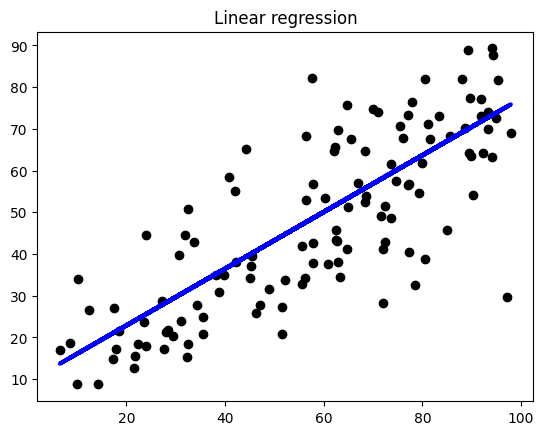

In [23]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()
plt.title('Linear regression')

plt.show()

Еще несколько метрик, которые можно использовать для оценки:

In [24]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

explained_variance = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Explained variance: %.2f' % explained_variance)
print('Mean absolute error: %.2f' % mae)

Explained variance: 0.62
Mean absolute error: 10.47


# K Nearest Neighbors

На прошлом занятии мы с вами обсуждали, что алгоритм k ближайших соседей используется как для регрессии, так и для классификации. Давайте попробуем самостоятельно реализовать этот алгоритм для задачи регрессии. (Это пример из лекции Ильи Щурова: https://github.com/ischurov/math-ml-hse-2018/blob/master/sem03_knn/sem03_knn.ipynb)

Предположим, что у нас есть некий набор признаков X и зависимая переменная y:

In [25]:
X = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([0, 1, 2])

Мы хотим найти y для нового вектора X_new.

In [26]:
X_new = np.array([0, 0, 1])

Для этого, согласно алгоритму k ближайших соседей, нам нужно найти, к какому из векторов тренировочной выборки новый вектор ближе всего. Расстояние между векторами обозначается через норму разностей этих векторов (больше про сравнение векторов здесь: https://dzen.ru/a/XEguZJw2sACu7e8l):

In [27]:
X - X_new

array([[0, 1, 0],
       [1, 0, 0],
       [1, 1, 0]])

In [28]:
diff = np.linalg.norm(X - X_new, axis=1)

In [29]:
diff

array([1.        , 1.        , 1.41421356])

np.argsort сортирует массив от малого к большому и возвращает соответствующий массив **индексов**.

In [30]:
sorted_ = np.argsort(diff)

In [31]:
sorted_

array([0, 1, 2])

**Вопрос по программированию:** а почему sorted_ с подчеркиванием?

Итак, мы отсортировали тренировочные вектора по близости к новому. Как сделать предсказание?

Помним, что мы должны выбрать k ближайших векторов к новому. Примем k = 2. Тогда возьмем эти два вектора и усредним их значения y, чтобы получить y_pred для нового вектора:

In [32]:
k = 2
# берем первые k элементов y_train и усредняем
y_pred = y[sorted_[:k]].mean()

In [33]:
y_pred

0.5

Напишем свой собственный класс:

In [34]:
class DummyKNNRegression():

  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors

  def fit(self, X_train, y_train):
    self.X = X_train
    self.y = y_train

  def predict(self, X_new_matrix):
    # на вход в функцию predict будет поступать не один новый вектор, а сразу много
    # так что функционал реализуем соответствующий
    y_pred_list = []

    for X_new in X_new_matrix:
      diff = np.linalg.norm(self.X - X_new, axis=1)
      sorted_ = np.argsort(diff)
      y_pred = self.y[sorted_[:self.n_neighbors]].mean()
      y_pred_list.append(y_pred)

    return y_pred_list

**Вопрос:** как превратить это в классификацию?

In [35]:
dummy_knn = DummyKNNRegression(n_neighbors=2)

In [36]:
dummy_knn.fit(X, y)

**Вопрос:** почему нужно добавить X_new в список?

In [37]:
dummy_knn.predict([X_new])

[0.5]

In [38]:
dummy_knn.X

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

Применим наш класс для моделирования зависимости простоты от сохранения смысла:

In [39]:
dummy_knn_for_sim = DummyKNNRegression(n_neighbors=5)

In [40]:
dummy_knn_for_sim.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

In [41]:
y_pred_sim = dummy_knn_for_sim.predict(np.array(X_test).reshape(-1, 1))

In [42]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_sim))
print("R squared: %.2f" % r2_score(y_test, y_pred_sim))

Mean squared error: 209.14
R squared: 0.52


Теперь посмотрим, как настоящий KNN-регрессор из sklearn работает на наших данных:

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [45]:
knn.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

KNeighborsRegressor()

In [46]:
y_pred_knn = knn.predict(np.array(X_test).reshape(-1, 1))

In [47]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_knn))
print("R squared: %.2f" % r2_score(y_test, y_pred_knn))

Mean squared error: 197.41
R squared: 0.55


# Регрессии на датасете California Housing

In [48]:
from sklearn.datasets import fetch_california_housing

In [49]:
housing = fetch_california_housing()

In [50]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [52]:
housing.target.shape

(20640,)

In [53]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [54]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [55]:
df['Value'] = housing.target

In [56]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Value'}>]], dtype=object)

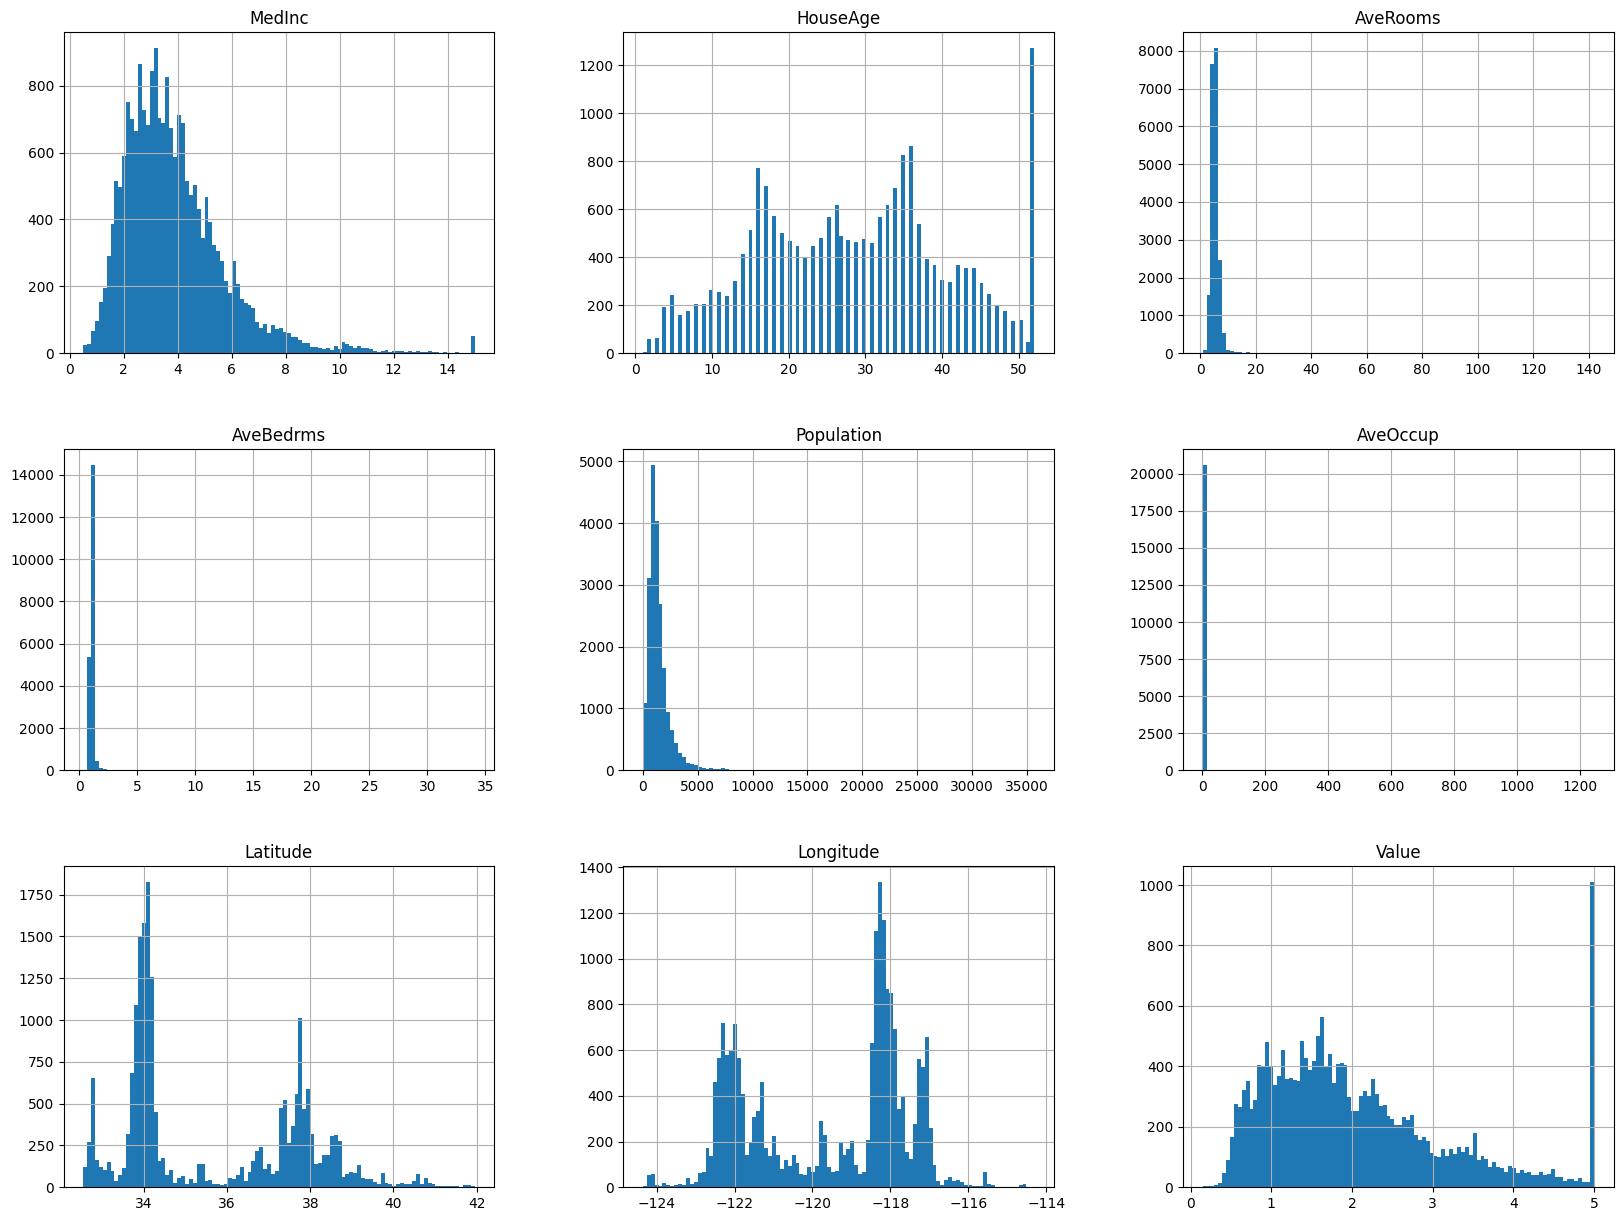

In [57]:
df.hist(bins=100, figsize=(20,15))

In [58]:
from scipy.stats import zscore

In [59]:
THRESHOLD_HIGH = 3
THRESHOLD_LOW = -3

In [60]:
from collections import defaultdict

In [61]:
zscore_dict = defaultdict(list)

for col in df.columns:
    current_zscore = zscore(df[col])
    zscore_dict[col] = current_zscore

In [62]:
zscore_df = pd.DataFrame(zscore_dict)

In [63]:
zscore_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [64]:
zscore_df[zscore_df[zscore_df >= THRESHOLD_HIGH].any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
131,4.069443,-0.845393,1.174583,-0.029966,-0.788104,-0.031123,1.033821,-1.307870,1.609668
283,1.112883,-0.527561,0.444492,-0.117104,3.143248,-0.051642,1.010411,-1.292896,1.422482
409,3.269770,1.856182,1.123642,-0.152110,-0.677723,-0.036004,1.061912,-1.352792,1.647799
510,4.205564,0.823227,1.003233,-0.237494,-0.545265,-0.048680,1.024457,-1.322844,2.540411
511,5.068140,1.061601,1.414389,-0.203999,-0.359824,-0.003067,1.024457,-1.322844,2.540411
...,...,...,...,...,...,...,...,...,...
20529,-0.479094,-1.322142,-0.207613,-0.156625,3.715467,-0.041976,1.366233,-1.103226,-0.022149
20530,-0.386136,-1.401600,-0.145012,-0.171229,5.791525,-0.036124,1.375597,-1.093244,-0.043814
20544,-0.950465,-0.448103,-0.252820,-0.175204,4.330955,0.037030,1.366233,-1.093244,0.108709
20563,-0.392505,-1.560516,-0.113573,0.048360,4.778663,-0.016481,1.422416,-1.088252,-0.644371


In [65]:
zscore_df[zscore_df[zscore_df <= THRESHOLD_LOW].any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value


In [66]:
df_to_remove = zscore_df[zscore_df[zscore_df >= THRESHOLD_HIGH].any(axis=1)]

In [67]:
df_no_outliers = df.drop(list(df_to_remove.index))

In [68]:
df_no_outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(df_no_outliers.loc[:, df_no_outliers.columns != 'Value'],
                                                                df_no_outliers['Value'],
                                                                test_size=0.2)

In [71]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(X_train_ch)

MinMaxScaler()

In [73]:
X_train_scaled = scaler.transform(X_train_ch)
X_test_scaled = scaler.transform(X_test_ch)

In [74]:
X_train_scaled

array([[0.38723747, 0.29411765, 0.24910371, ..., 0.07006005, 0.51540914,
        0.23877551],
       [0.21395287, 0.37254902, 0.34001499, ..., 0.10157445, 0.46652497,
        0.26326531],
       [0.26896491, 1.        , 0.30009927, ..., 0.15919186, 0.55791711,
        0.21632653],
       ...,
       [0.36201718, 0.60784314, 0.44211343, ..., 0.12216014, 0.51965994,
        0.35816327],
       [0.41853095, 0.74509804, 0.41606732, ..., 0.07902865, 0.59298618,
        0.21530612],
       [0.841015  , 0.29411765, 0.60787168, ..., 0.11702102, 0.5717322 ,
        0.23877551]])

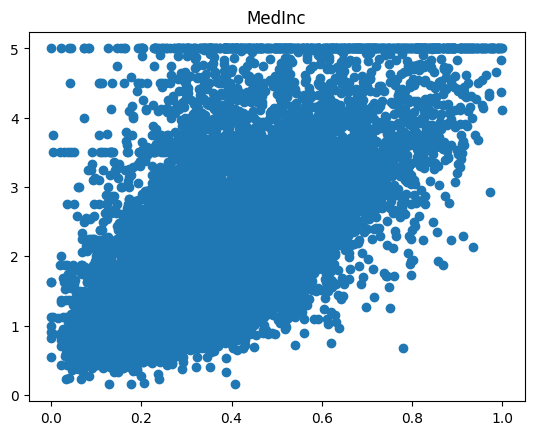

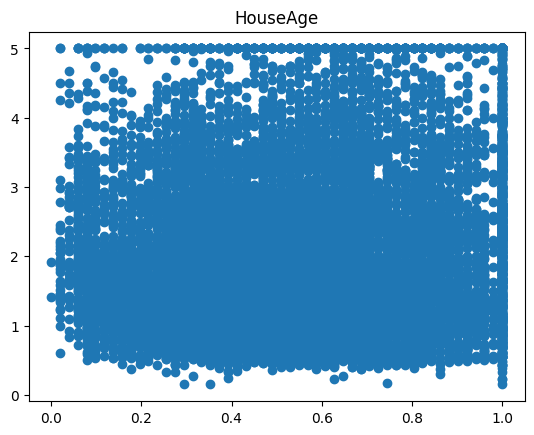

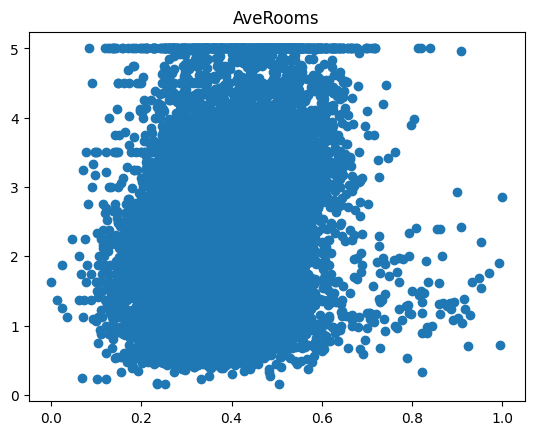

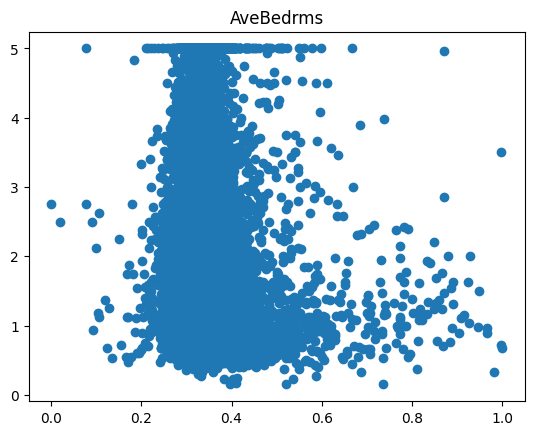

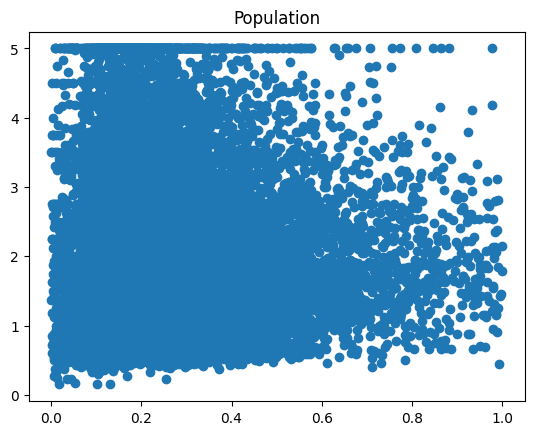

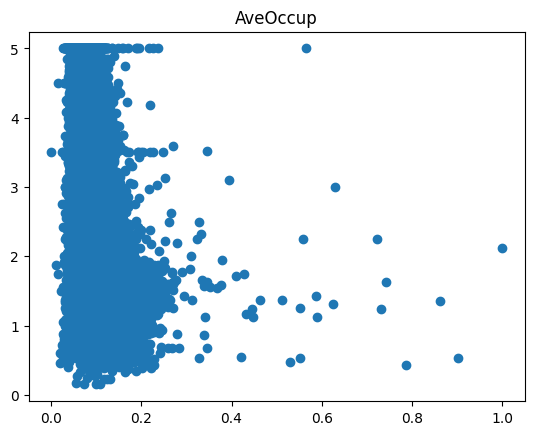

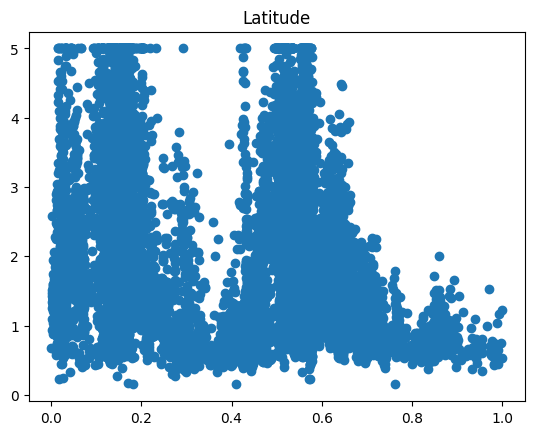

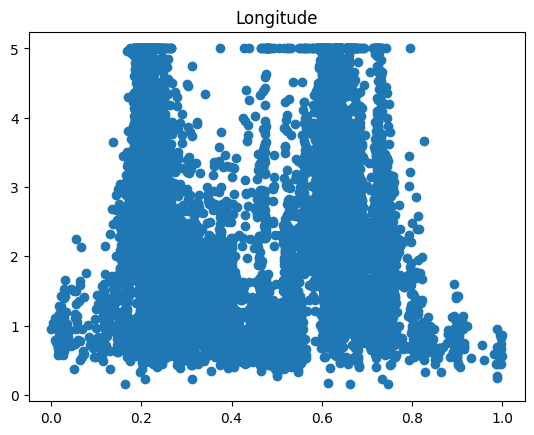

In [75]:
for i in range(X_train_scaled.shape[1]):
  current_col_name = X_train_ch.columns[i]
  current_X = X_train_scaled[:, i]
  plt.scatter(current_X, y_train_ch)
  plt.title(current_col_name)
  plt.show()

In [76]:
ln_ch = LinearRegression()

In [77]:
ln_ch.fit(X_train_scaled, y_train_ch)

LinearRegression()

In [78]:
ln_ch_pred = ln_ch.predict(X_test_scaled)

In [79]:
def get_scores(y_test, y_pred):
  print('R^2: %.2f' % r2_score(y_test, y_pred))
  print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
  print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

In [80]:
get_scores(y_test_ch, ln_ch_pred)

R^2: 0.63
MSE: 0.46
MAE: 0.49


In [81]:
from sklearn.linear_model import Ridge, Lasso

In [82]:
lasso = Lasso()

In [83]:
lasso.fit(X_train_scaled, y_train_ch)

Lasso()

In [84]:
lasso_pred = lasso.predict(X_test_scaled)

In [85]:
get_scores(y_test_ch, lasso_pred)

R^2: -0.00
MSE: 1.25
MAE: 0.88


In [86]:
lasso.coef_

array([ 0.,  0.,  0., -0., -0., -0., -0., -0.])

In [87]:
ridge = Ridge()

In [88]:
ridge.fit(X_train_scaled, y_train_ch)
ridge_pred = ridge.predict(X_test_scaled)

In [89]:
get_scores(y_test_ch, ridge_pred)

R^2: 0.63
MSE: 0.46
MAE: 0.49


In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures(2)

In [92]:
poly.fit(X_train_scaled)

PolynomialFeatures()

In [93]:
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [94]:
ln_poly = LinearRegression()

In [95]:
ln_poly.fit(X_train_poly, y_train_ch)

LinearRegression()

In [96]:
preds_poly = ln_poly.predict(X_test_poly)

In [97]:
get_scores(y_test_ch, preds_poly)

R^2: 0.68
MSE: 0.40
MAE: 0.43
